In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import sqlite3

from conf_PPO import *

In [2]:
path_training_1 = "tmp/ppo_training_1/db_training.db"
path_training_2 = "tmp/ppo_training/db_training.db"

In [3]:
def get_df_training(path_db_to_connect):
    conn = sqlite3.connect(path_db_to_connect)
    cursor = conn.cursor()
    cursor.execute("PRAGMA table_info(trial_1)")
    columns_info = cursor.fetchall()
    column_names = [info[1] for info in columns_info]
    cursor.execute("SELECT * FROM trial_1")
    row = cursor.fetchall()
    conn.close()
    df_trial = pd.DataFrame(row, columns=column_names)
    return df_trial

In [4]:
def get_df_result(path_db_to_connect):
    conn = sqlite3.connect(path_db_to_connect)
    cursor = conn.cursor()
    cursor.execute("PRAGMA table_info(trials)")
    columns_info = cursor.fetchall()
    column_names = [info[1] for info in columns_info]
    cursor.execute("SELECT * FROM trials")
    row = cursor.fetchall()
    conn.close()
    df_trial = pd.DataFrame(row, columns=column_names)
    return df_trial

In [5]:
def plot_training(df, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # --- Set proper percentiles for color normalization ---
    vmin = np.percentile(df["mean_actor_loss"], 1)
    vmax = np.percentile(df["mean_actor_loss"], 99)

    # Scatter plot with normalized hue
    scatter = sns.scatterplot(
        data=df,
        x="episode_number",
        y="final_reward",
        hue="mean_actor_loss",
        palette="coolwarm",
        hue_norm=(vmin, vmax),  # apply normalization
        s=50,
        ax=ax1,
        legend=False,
        size=5
    )
    ax1.set_ylabel("Reward (Portfolio)")
    ax1.set_ylim(-2500)
    ax1.grid(True)

    # Histogram on twin y-axis
    ax2 = ax1.twinx()
    sns.histplot(
        data=df,
        x="episode_number",
        weights="actions_buy",
        bins=df["episode_number"].nunique(),
        alpha=0.3,
        color="gray",
        multiple="layer",
        shrink=0.8,
        ax=ax2
    )
    ax2.set_ylabel("Number of Trades")
    ax2.set_ylim(0, df["actions_buy"].max()*3)

    # --- Add continuous colorbar matching normalization ---
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    sm = matplotlib.cm.ScalarMappable(cmap="coolwarm", norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax1)
    cbar.set_label("Mean Actor Loss", fontsize=12)

    plt.xlabel("Episode")
    plt.title(f"{title} - Analysis")
    plt.show()


In [6]:
df_result_1 = get_df_result(path_training_1)

df_result_2   = get_df_result(path_training_2)
df_training_2 = get_df_training(path_training_2)

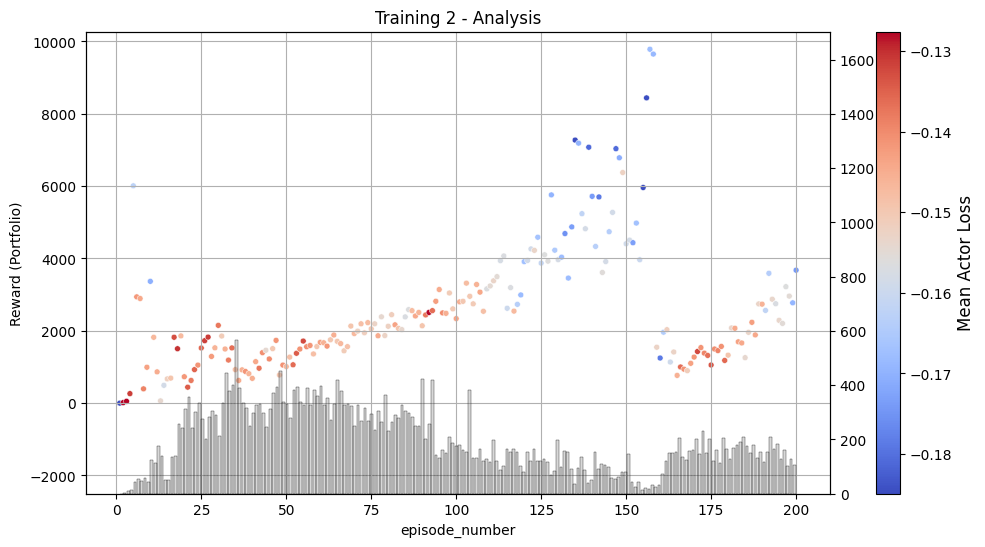

In [7]:
plot_training(df_training_2, title="Training 2")